In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv(r'C:\ProgramData\census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
df.shape

(32560, 15)

In [3]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# There are 32560 rows and 15 columns in the dataset.
# 6 features are of interger type and 9 features are of object type
# Above data shows there are no null values in dataset

#    Age            : Persons age
#   Workclass      : type of work
#   Fnlwgt         : Final weight
#   Education      : Educational qualification
#   Education_num  : Number of years of education
#  Marital_status : Married/not married
#  Occupation     : Persons Occupation
#  Relationship   : Relationship
#   Race           : Race
#   Sex            : Gender
#  Capital_gain   : profit one earns
#  Capital_loss   : profit one loose
#  Hours_per_week : Earning rate as per hrs
#  Native_country : Country
#  Income         : Income (Target variable)

In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# From the above data ,it is clear that capital_gain,capital_loss std is more than mean ,so there are chances of 
# outliers in the data .we need to check further
# Values are different for different features and vary a lot.So scaling is needed in dataset

In [7]:
# checking null values in dataset

df.isnull().sum()

# below data shows ,there are no null values in dataset

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
# Checking for unique values of Native_country and Occupation to verify null values represented by ?

df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [9]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
# Checking for number of rows of Native_country and Occupation feature having values "?"

df.loc[(df.Native_country==' ?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [11]:
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [12]:
# we can see “Native_country” contains 583 missing values and “Occupation” contains 1816 missing values.
# But in comparision to dataset having 32560 rows,we can neglect these '?' values and drop them

In [13]:
# Dropping '?' values from dataset

df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)

In [14]:
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

In [15]:
# converting dataset features from categorical to numeric

le=LabelEncoder()
df=df.apply(le.fit_transform)     
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,4,2726,9,12,2,3,0,4,1,0,0,12,38,0
1,21,2,13187,11,8,0,5,1,4,1,0,0,39,38,0
2,36,2,14353,1,6,2,5,0,2,1,0,0,39,38,0
3,11,2,18119,9,12,2,9,5,2,0,0,0,39,4,0
4,20,2,16566,12,13,2,3,5,4,0,0,0,39,38,0


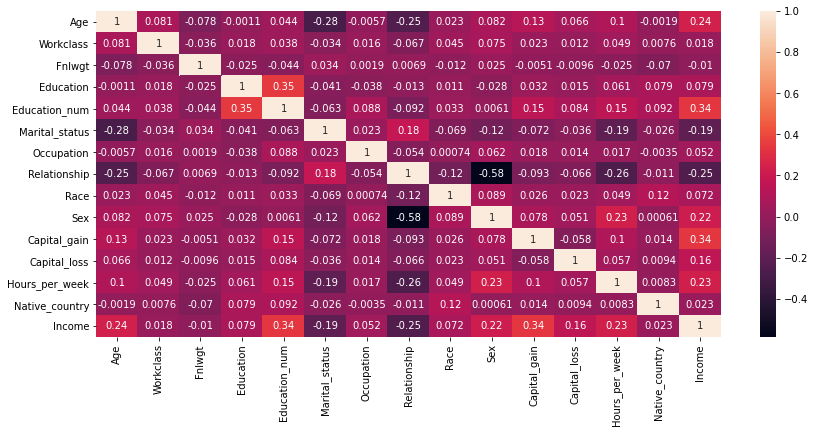

In [16]:
# checking correlation of independent variables with 'Income' variable

plt.figure(figsize=(14,6))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [17]:
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.337331
Education_num     0.335317
Age               0.242196
Hours_per_week    0.232328
Sex               0.216715
Capital_loss      0.162075
Education         0.078981
Race              0.071666
Occupation        0.051551
Native_country    0.023273
Workclass         0.018103
Fnlwgt           -0.009987
Marital_status   -0.193504
Relationship     -0.251009
Name: Income, dtype: float64

In [18]:
# Clearly from above correlation matrix and data , 'Income' has positive correlation maximum with Capital_gain,Education_num,Age
#and negatively correlated with Relationship,Marital_status

<function matplotlib.pyplot.show(close=None, block=None)>

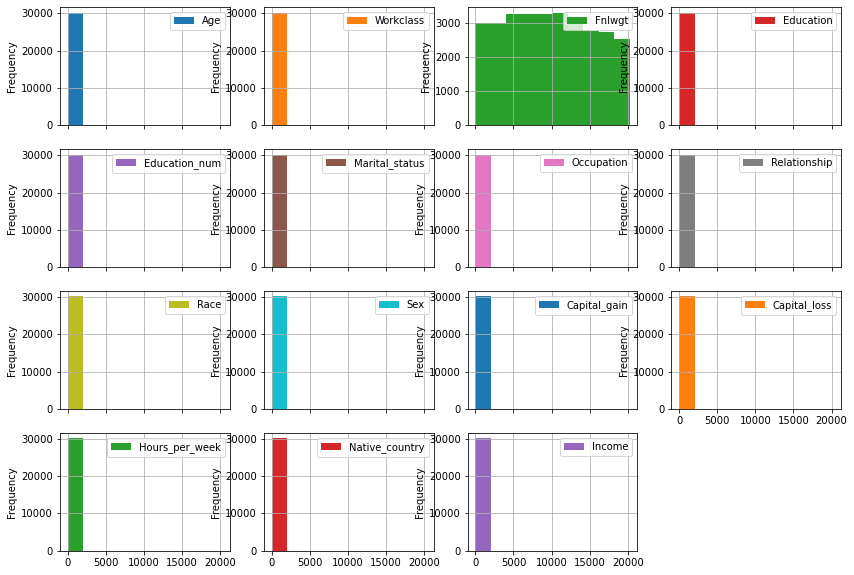

In [19]:
# Distribution plot of dataset

df.plot(kind='hist', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

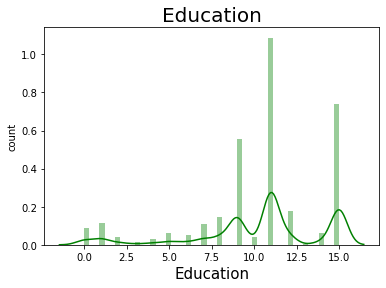

In [20]:
# checking distibution of Education feature

sns.distplot(df['Education'], color = 'green')
plt.title('Education', fontsize = 20)
plt.xlabel('Education', fontsize = 15)
plt.ylabel('count')
plt.show()

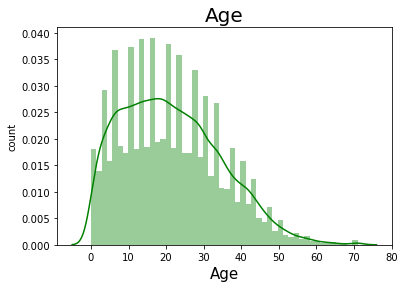

In [21]:
# checking distibution of Age feature

sns.distplot(df['Age'], color = 'green')
plt.title('Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

In [22]:
# Clearly there is skewness in both Education and Age Features

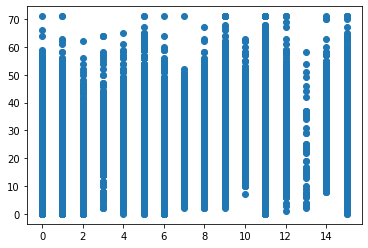

In [23]:
# Lets plot to see how education and age are related

plt.scatter(x='Education',y='Age',data=df)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='count'>

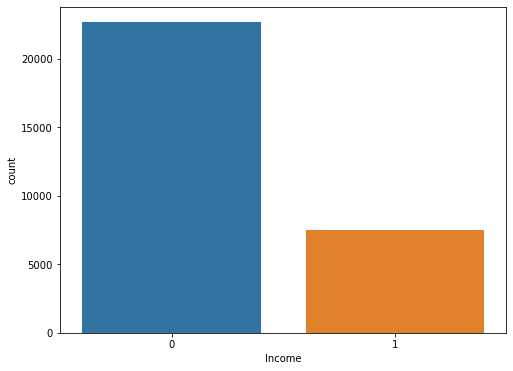

In [24]:
# Plotting 'Income'  variable

plt.figure(figsize=(8,6))
sns.countplot(x='Income',data=df)

In [25]:
# clearly data is unbalanced

<function matplotlib.pyplot.show(close=None, block=None)>

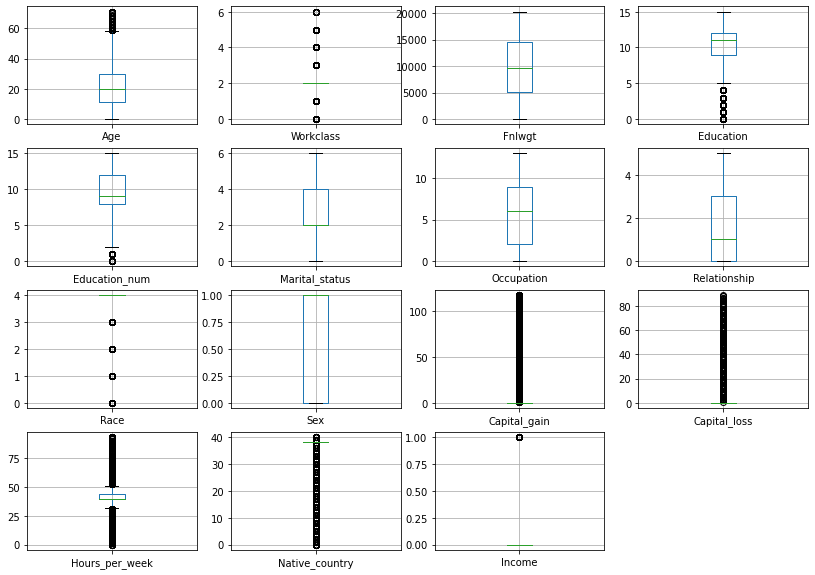

In [26]:
# Checking outliers in data

df.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

In [27]:
# Removing Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))


In [28]:
threshold = 3
print(np.where(z< 3))

(array([    0,     0,     0, ..., 30160, 30160, 30160], dtype=int64), array([ 0,  1,  2, ..., 12, 13, 14], dtype=int64))


In [29]:
#Removing outliers

df_outlier = df[(z< 3).all(axis=1)]

In [30]:
# Rechecking of removal of outliers:

df.shape

(30161, 15)

In [31]:
df_outlier.shape

(25114, 15)

In [32]:
X=df_outlier.drop(['Income'],axis=1)
y=df_outlier['Income']

In [33]:
# Checking skewness in features

X.skew().sort_values()

Native_country   -5.204681
Race             -2.575134
Education        -0.963999
Sex              -0.688101
Hours_per_week   -0.286117
Education_num    -0.141015
Marital_status   -0.078181
Fnlwgt            0.043425
Occupation        0.126983
Age               0.470614
Relationship      0.752051
Workclass         1.209807
Capital_gain      5.832192
Capital_loss      9.792136
dtype: float64

In [34]:
# Removing skewness

from sklearn.preprocessing import power_transform
z = power_transform(X[0:])
data_new= pd.DataFrame(z,columns=X.columns)
X = data_new


In [35]:
# Checking skewness in features

X.skew().sort_values()

Race             -2.519061
Sex              -0.688101
Education        -0.309019
Fnlwgt           -0.265912
Occupation       -0.203356
Marital_status   -0.144157
Age              -0.113973
Education_num     0.035389
Relationship      0.103362
Hours_per_week    0.114285
Workclass         0.123760
Native_country    1.389927
Capital_gain      4.888910
Capital_loss      8.524474
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

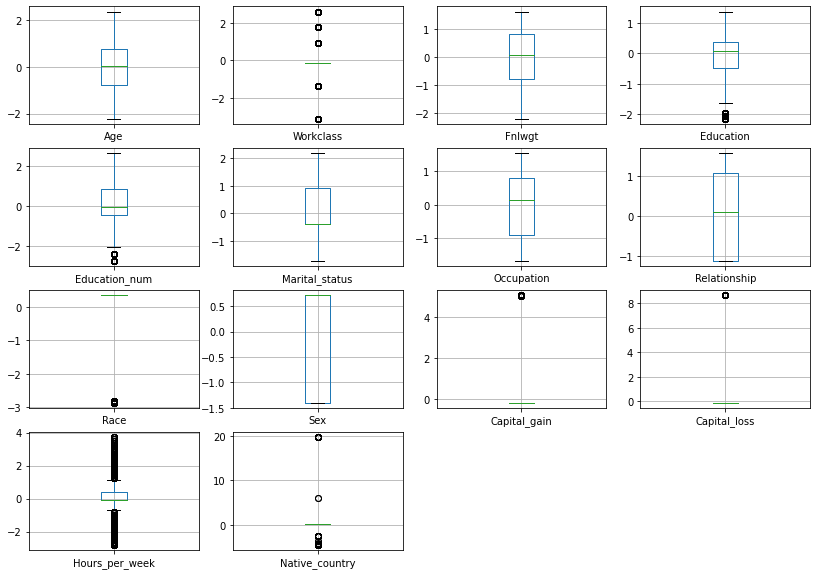

In [36]:
X.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

In [37]:
# Scaling the dataset


from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)

In [38]:
# Evaluating models

# Training the model using LogisticRegression and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_lr_1 = LogisticRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr_1.fit(X_train, y_train)
    y_pred_lr_1 = model_lr_1.predict(X_test)
    score=accuracy_score(y_test,y_pred_lr_1)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for LogisticRegression : ',state)
print('best accuracy score for LogisticRegression : ',score_s)

best random_state for LogisticRegression :  21
best accuracy score for LogisticRegression :  0.8372926343729263


In [39]:
# finding classification_report for LogisticRegression 

print(classification_report(y_test, y_pred_lr_1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6097
           1       0.60      0.34      0.43      1438

    accuracy                           0.83      7535
   macro avg       0.73      0.64      0.67      7535
weighted avg       0.81      0.83      0.81      7535



In [40]:
# finding cross validation score without removing overfitting

cvs = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for LogisticRegression : ",cvs)

cross_val_score for LogisticRegression :  0.8341056639930112


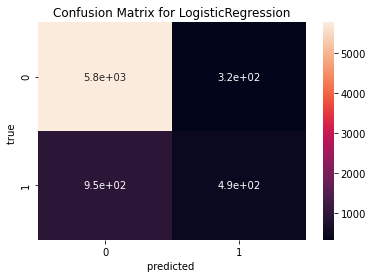

In [41]:
# confusion matrix of LogisticRegression model

cm=confusion_matrix(y_test,y_pred_lr_1)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [42]:
# Training the model using DecisionTreeClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_dtc = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dtc.fit(X_train, y_train)
    y_pred_dtc = model_dtc.predict(X_test)
    score=accuracy_score(y_test,y_pred_dtc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for DecisionTreeClassifier : ',state)
print('best accuracy score for DecisionTreeClassifier : ',score_s)

best random_state for DecisionTreeClassifier :  4
best accuracy score for DecisionTreeClassifier :  0.8029197080291971


In [43]:
# finding classification_report for DecisionTreeClassifier

print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6097
           1       0.46      0.51      0.48      1438

    accuracy                           0.79      7535
   macro avg       0.67      0.68      0.68      7535
weighted avg       0.80      0.79      0.80      7535



In [44]:
# finding cross validation score for DecisionTreeClassifier 

cvs = cross_val_score(DecisionTreeClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for DecisionTreeClassifier  : ",cvs)

cross_val_score for DecisionTreeClassifier  :  0.7937653453383635


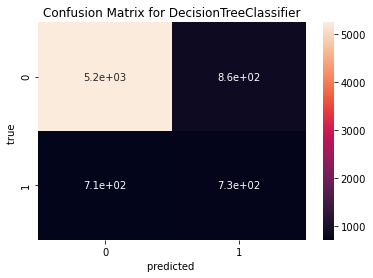

In [45]:
# confusion matrix of DecisionTreeClassifier  model

cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [46]:
# Training the model using SVC and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_svc =SVC()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =5)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
score=accuracy_score(y_test,y_pred_svc)
        
print('best accuracy score for SVC model : ',score)

best accuracy score for SVC model :  0.8321167883211679


In [47]:
# Training the model using  KNeighborsClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_knc = KNeighborsClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_knc.fit(X_train, y_train)
    y_pred_knc = model_knc.predict(X_test)
    score=accuracy_score(y_test,y_pred_knc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)

best random_state :  24
best accuracy score :  0.8329130723291307


In [48]:
# finding classification_report for KNeighborsClassifier

print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6097
           1       0.57      0.51      0.54      1438

    accuracy                           0.83      7535
   macro avg       0.73      0.71      0.72      7535
weighted avg       0.83      0.83      0.83      7535



In [49]:
# finding cross validation score for  KNeighborsClassifier

accuracy = cross_val_score( KNeighborsClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print(accuracy)

0.8268107058943712


In [50]:
# Comparing accuracy score and cross val score of different models,KNeighborsClassifier model seems to be best 
# model for this problem

In [51]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
knn_range = list(range(1, 20))
param_grid = dict(n_neighbors=knn_range)


In [52]:
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [53]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
#GCV.fit(x_train,y_train)
grid.best_params_  # Printing the best parameter found by GridSearchCV

Fitting 10 folds for each of 19 candidates, totalling 190 fits


{'n_neighbors': 16}

In [54]:
GCV_pred=grid.best_estimator_.predict(X_test)   # predicting the best parameters
accuracy_score(y_test,GCV_pred)    # checking final accuracy

0.8436629064366291

In [ ]:
# Final accuracy_score clearly states that KNeighborsClassifier model is very good enough to predict 'Income'

In [61]:
# AUC_ROC curve

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25 ,test_size=0.3)

knc_1 = KNeighborsClassifier(n_neighbors=1)
knc_1.fit(X_train,y_train)
y_predicted_knc=knc_1.predict(X_test)

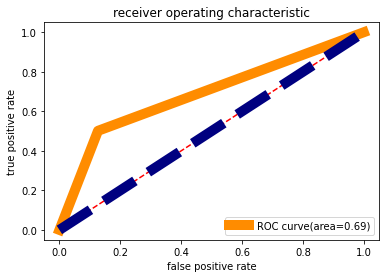

In [62]:

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_predicted_knc,pos_label=True)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Above roc_curve area clearly states the goodness of  KNeighborsClassifier model for predicting 'Income'

In [64]:
# Exporting the model through pickle

import pickle
filename='census_income_knn.pkl'
pickle.dump(knc_1,open(filename,'wb'))

In [66]:
# Conclusion:

import numpy as np
a=np.array(y_test)
predicted=np.array(knc_1.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com.head(20)

,original,predcited
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1
